In [1]:
# First importing the required packages:
%matplotlib inline
import sparse_ternary_networks.Tools as T
import numpy as np
import sparse_ternary_networks.MLSTC as MLSTC
from scipy.linalg import eigh
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

In [3]:
# Initializing the parameters:
n = 512      # dimension
m = 512       # dimension of the codes
N = 10000     # number of samples, say for both train and test sets.
k = 10         # number of non-zero elements of the STC at each stage.
L = 5        # number of layer units of the network.
Rho = 0.9     # the coefficient of the AR(1) source.

In [4]:
# The covariance matrix of the AR(1) process with its toeplitz structure:
cov_mat = toeplitz(Rho**np.arange(n))
# Generating the train and test sets:
F0_train = np.linalg.cholesky(cov_mat) @ np.random.randn(n,N)
F0_test = np.linalg.cholesky(cov_mat) @ np.random.randn(n,N)
# Normalization (scalar):
# F0_train -= np.mean(F0_train)
# F0_train /= np.std(F0_train)
# #
# F0_test -= np.mean(F0_test)
# F0_test /= np.std(F0_test)

In [5]:
# # SLB calculation using reverse-water-filling:
# EigValues, _ = eigh(cov_mat)
# Rate_SLB= np.linspace(0,4,100)
# Distortion_SLB = []
# for Rate in Rate_SLB:
#     Distortion_SLB.append(np.sum(T.rev_WaterFiller(EigValues,Rate)[3])/n)
# #
# plt.subplot(1,2,1)
# plt.plot(Rate_SLB,Distortion_SLB,color='BLACK') 
# plt.grid()
# plt.xlabel('Rate')
# plt.ylabel('Distortion')
# #
# plt.subplot(1,2,2)
# plt.semilogy(Rate_SLB,Distortion_SLB,color='BLACK') 
# plt.grid()
# plt.xlabel('Rate')
# plt.ylabel('Distortion')

In [6]:
# Training the network:
obj_train = MLSTC.BaseLearner(k,L,m=m)
_,_,_ = obj_train.run(F0_train)

 ################## Starting to learn network parameters:  ##################
layer-units:
** 1 **** 2 **** 3 **** 4 **** 5 **
Finished learning network parameters:


In [7]:
# Testing the network:
obj_test = MLSTC.fwdPass(obj_train.params,k,ternaryProbMap=obj_train.prob_z)
_,_,_ = obj_test.run(F0_test)

 Running the network:
 ##################  Running the network:  ##################
layer-units:
** 1 **** 2 **** 3 **** 4 **** 5 **
Finished running the network.


NameError: name 'Rate_SLB' is not defined

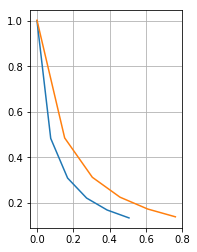

In [8]:
plt.subplot(1,2,1)
plt.plot(obj_train.rate,obj_train.distortion)
plt.plot(obj_test.rate,obj_test.distortion)
plt.grid()
plt.plot(Rate_SLB,Distortion_SLB,color='BLACK')
plt.xlabel('Rate')
plt.ylabel('Distortion')
# 
plt.subplot(1,2,2)
plt.semilogy(obj_train.rate,obj_train.distortion)
plt.semilogy(obj_test.rate,obj_test.distortion)
plt.grid()
plt.semilogy(Rate_SLB,Distortion_SLB,color='BLACK')
plt.xlabel('Rate')
plt.ylabel('Distortion')

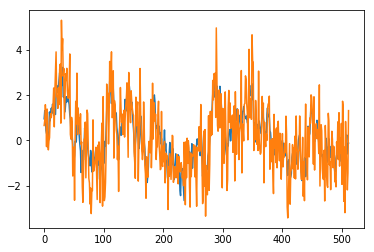

In [9]:
F0_noisy = F0_test + 1.1 * np.random.randn(n,N)
plt.plot(F0_test[:,0])
plt.plot(F0_noisy[:,0])

In [10]:
# Testing the network:
F0_input = F0_noisy
print(np.linalg.norm(F0_input-F0_test)**2/np.linalg.norm(F0_test)**2)

1.2070553540896516


 Running the network:
 ##################  Running the network:  ##################
layer-units:
** 1 **** 2 **** 3 **** 4 **** 5 **
Finished running the network.
0.4253407545063309
1.0371004637571315


/home/sssohrab/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


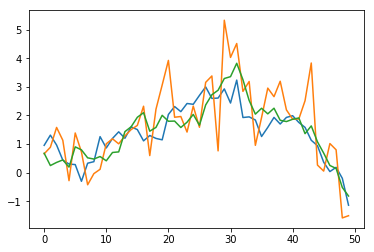

In [11]:
obj_denoiser = MLSTC.fwdPass(obj_train.params,k,ternaryProbMap=obj_train.prob_z)

_,F0_denoised,_ = obj_denoiser.run(F0_input)
F0_denoised = np.sum(F0_denoised[i] for i in range(L))
F0_input =  0.9* F0_input + 0.1* F0_denoised 

print(np.linalg.norm(F0_denoised-F0_test)**2/np.linalg.norm(F0_test)**2)
print(np.linalg.norm(F0_input-F0_test)**2/np.linalg.norm(F0_test)**2)

plt.plot(F0_test[0:50,0])
plt.plot(F0_noisy[0:50,0])
plt.plot(F0_denoised[0:50,0])

0.24908326944085823
iter =  0
 Running the network:
 ##################  Running the network:  ##################
layer-units:
** 1 **** 2 **** 3 **** 4 **** 5 **
Finished running the network.
 ...... input =  0.24546705974250788    ............ output =  0.20690897639314193
iter =  1
 Running the network:
 ##################  Running the network:  ##################
layer-units:
** 1 **

/home/sssohrab/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


** 2 **** 3 **** 4 **** 5 **
Finished running the network.
 ...... input =  0.24195045205989943    ............ output =  0.2069239839271884
iter =  2
 Running the network:
 ##################  Running the network:  ##################
layer-units:
** 1 **** 2 **** 3 **** 4 **** 5 **
Finished running the network.
 ...... input =  0.23853108893310107    ............ output =  0.2069245722437125
iter =  3
 Running the network:
 ##################  Running the network:  ##################
layer-units:
** 1 **** 2 **** 3 **** 4 **** 5 **
Finished running the network.
 ...... input =  0.23520691525319246    ............ output =  0.20696066157472343
iter =  4
 Running the network:
 ##################  Running the network:  ##################
layer-units:
** 1 **** 2 **** 3 **** 4 **** 5 **
Finished running the network.
 ...... input =  0.23197553207539187    ............ output =  0.20698183905568976
iter =  5
 Running the network:
 ##################  Running the network:  #################

** 1 **** 2 **** 3 **** 4 **** 5 **
Finished running the network.
 ...... input =  0.17028424071797982    ............ output =  0.20824628683478985
iter =  34
 Running the network:
 ##################  Running the network:  ##################
layer-units:
** 1 **** 2 **** 3 **** 4 **** 5 **
Finished running the network.
 ...... input =  0.16902059536041195    ............ output =  0.20834165309620672
iter =  35
 Running the network:
 ##################  Running the network:  ##################
layer-units:
** 1 **** 2 **** 3 **** 4 **** 5 **
Finished running the network.
 ...... input =  0.16780108986400835    ............ output =  0.2084091531192052
iter =  36
 Running the network:
 ##################  Running the network:  ##################
layer-units:
** 1 **** 2 **** 3 **** 4 **** 5 **
Finished running the network.
 ...... input =  0.16662469792948542    ............ output =  0.20850521923607918
iter =  37
 Running the network:
 ##################  Running the network:  #####

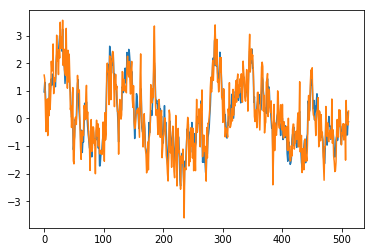

In [12]:
F0_noisy = F0_test + 0.5 * np.random.randn(n,N)
plt.plot(F0_test[:,0])
plt.plot(F0_noisy[:,0])
###
step_size = 1e-3
lmda = 10
##
F0_input = F0_noisy
print(np.linalg.norm(F0_input-F0_test)**2/np.linalg.norm(F0_test)**2)
##
for i in range(40):
    print('iter = ' ,i)
    obj_denoiser = MLSTC.fwdPass(obj_train.params,k,ternaryProbMap=obj_train.prob_z)
    _,F0_output,_ = obj_denoiser.run(F0_input)
    F0_output = np.sum(F0_output[i] for i in range(L))
    F0_input -=  step_size * (F0_input * (1 + lmda) - F0_noisy - lmda * F0_output)
    print(' ...... input = ',np.linalg.norm(F0_input-F0_test)**2/np.linalg.norm(F0_test)**2,end= '   ')
    print(' ............ output = ', np.linalg.norm(F0_output-F0_test)**2/np.linalg.norm(F0_test)**2)

0.7268839718053489
0.42985058528174097


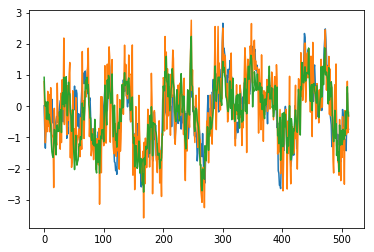

In [26]:
plt.plot(F0_test[:,0])
plt.plot(F0_noisy[:,0])
plt.plot(F0_output[:,0])
print(np.linalg.norm(F0_input-F0_test)**2/np.linalg.norm(F0_test)**2)
print(np.linalg.norm(F0_output-F0_test)**2/np.linalg.norm(F0_test)**2)